<a href="https://colab.research.google.com/github/Mojtaba1996-glitch/-Statistical-analysis-/blob/main/ES2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('data2.csv', encoding='latin1')

In [ ]:
df

,Month,Site,AT (°C),WT(°C),pH,Cond. (µs/cm),TDS (mg/L),Turbidity (NTU),DO (mg/L),BOD (mg/L),NH4+-N (mg/L),NO3--N(mg/L),o-PO43-(mg/L),Velocity(m/s),Chemical Index
0,April,HKK1,36.0,25.87,8.18,97.67,63.67,17.60,6.00,1.60,0.25,1.10,0.15,0.18,65
1,April,HKK2,36.0,26.33,8.16,356.33,232.00,7.43,4.33,2.83,0.46,0.47,0.64,0.11,40
2,May,HKK1,31.2,24.23,6.79,82.00,53.00,8.80,6.00,2.40,0.26,1.47,0.30,0.07,62
3,May,HKK2,36.0,27.50,7.83,404.00,262.00,29.03,5.70,1.20,1.53,1.10,1.11,0.04,40
4,June,HKK1,25.0,24.50,7.00,52.30,34.00,8.80,3.50,1.30,0.30,0.70,0.30,0.48,56
5,June,HKK2,27.0,26.05,7.83,325.00,211.00,19.60,5.33,1.47,0.73,1.23,1.02,0.07,49
6,July,HKK1,28.2,25.09,7.34,52.00,34.00,6.60,4.53,0.53,0.35,0.13,0.15,0.24,62
7,July,HKK2,29.8,27.47,8.01,269.33,175.00,6.33,5.27,2.93,0.44,0.13,0.23,0.07,53
8,August,HKK1,25.0,24.47,7.33,52.00,37.00,3.40,5.53,0.60,0.04,0.33,0.23,0.37,71
9,August,HKK2,31.5,26.51,7.61,167.33,107.33,5.87,5.80,1.73,0.32,0.93,0.54,0.23,51


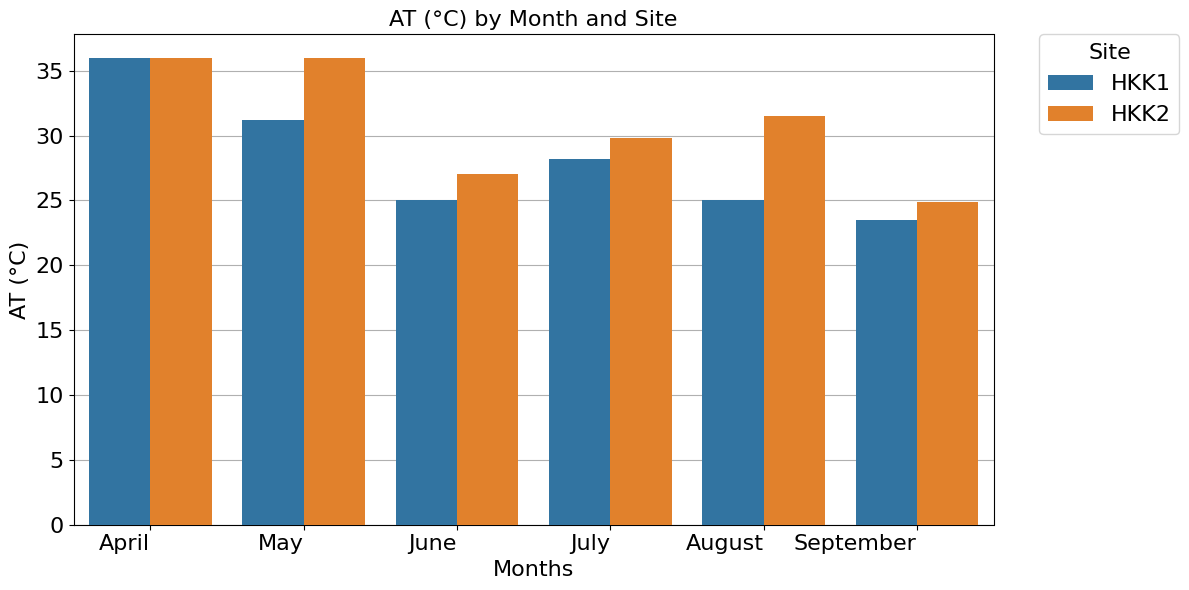

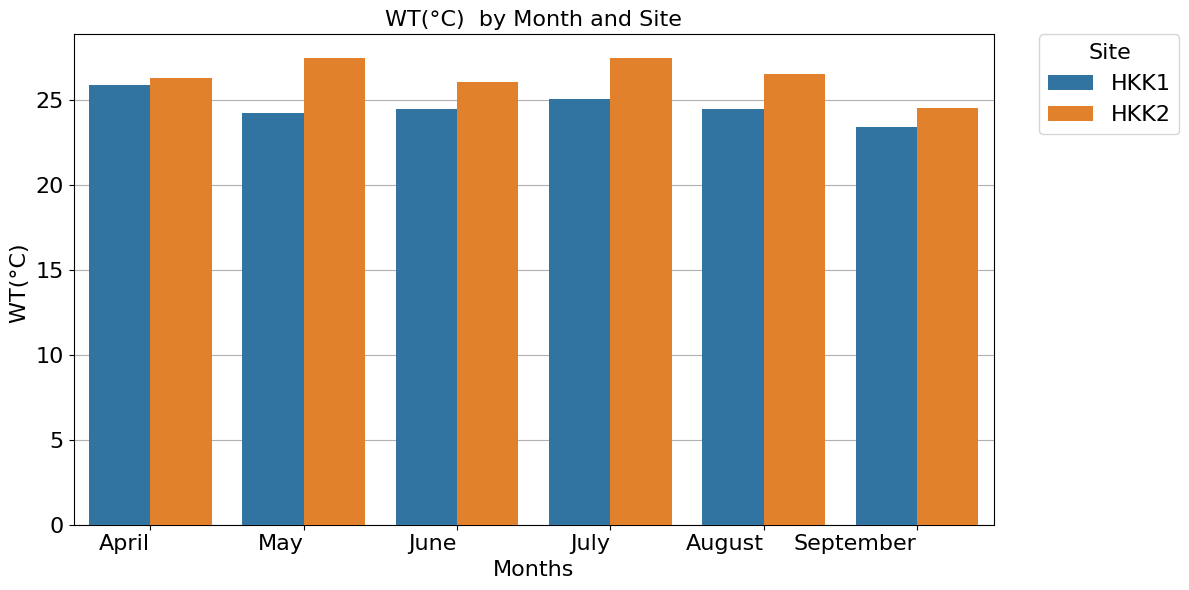

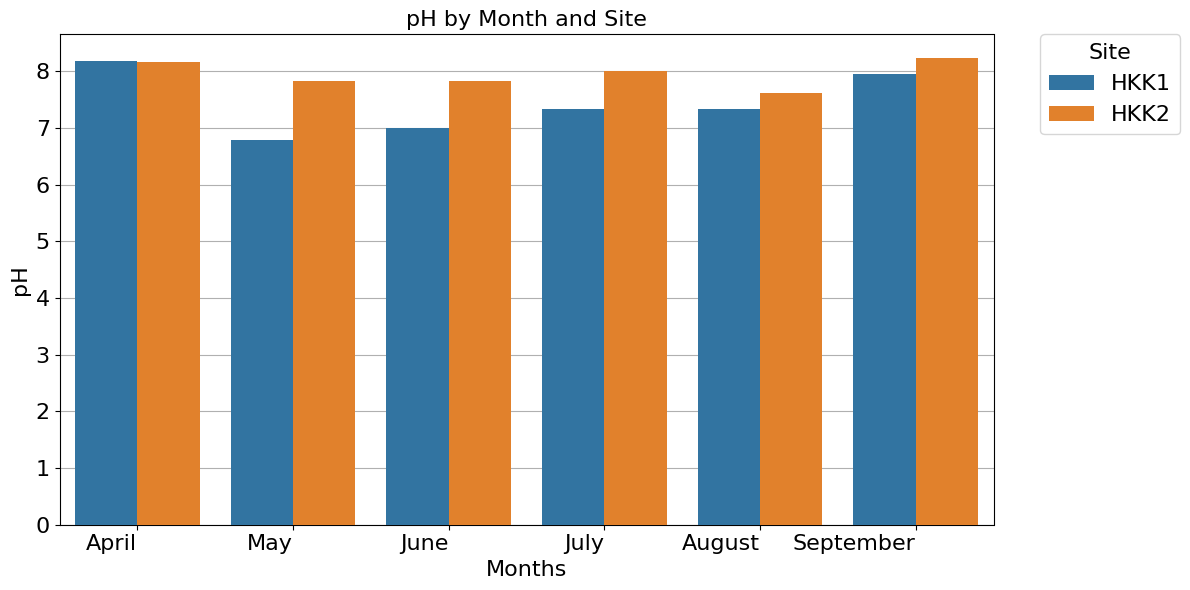

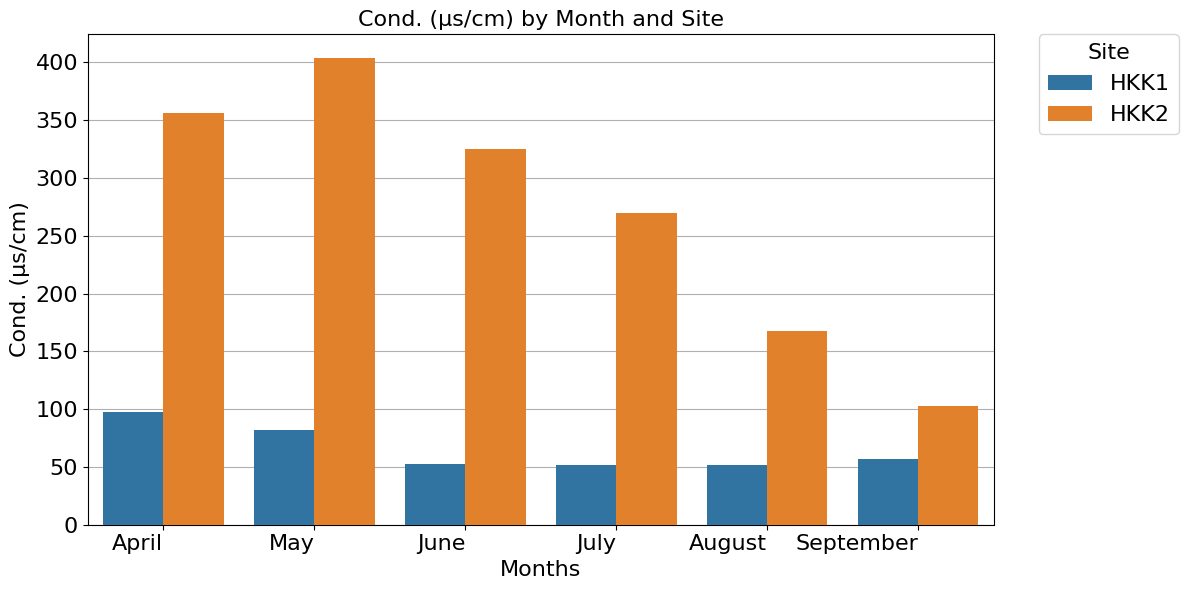

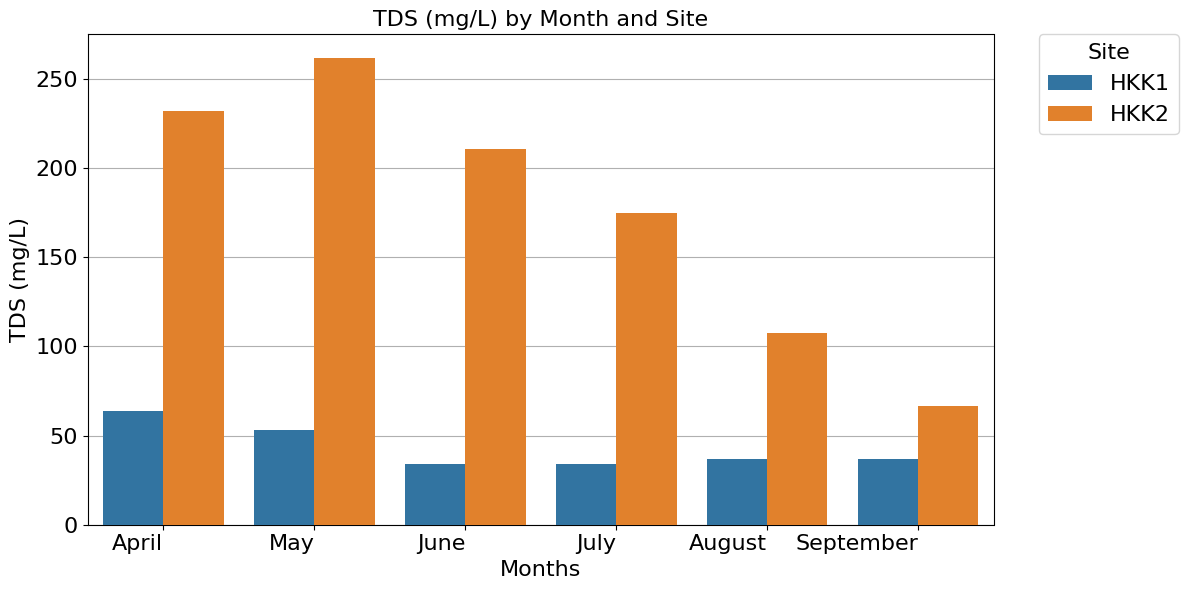

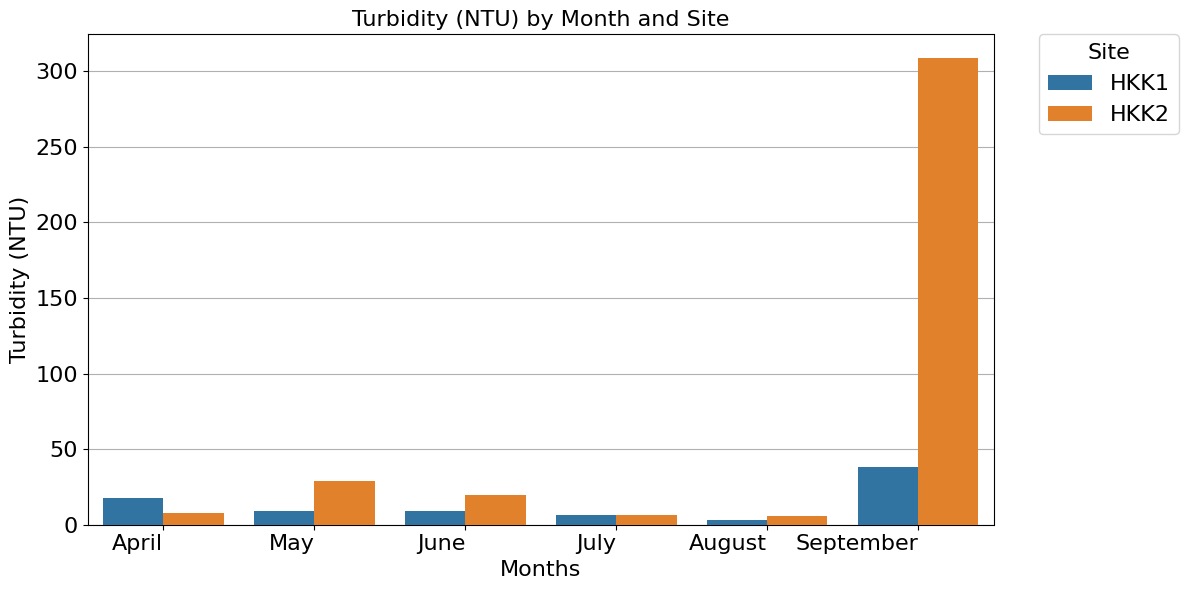

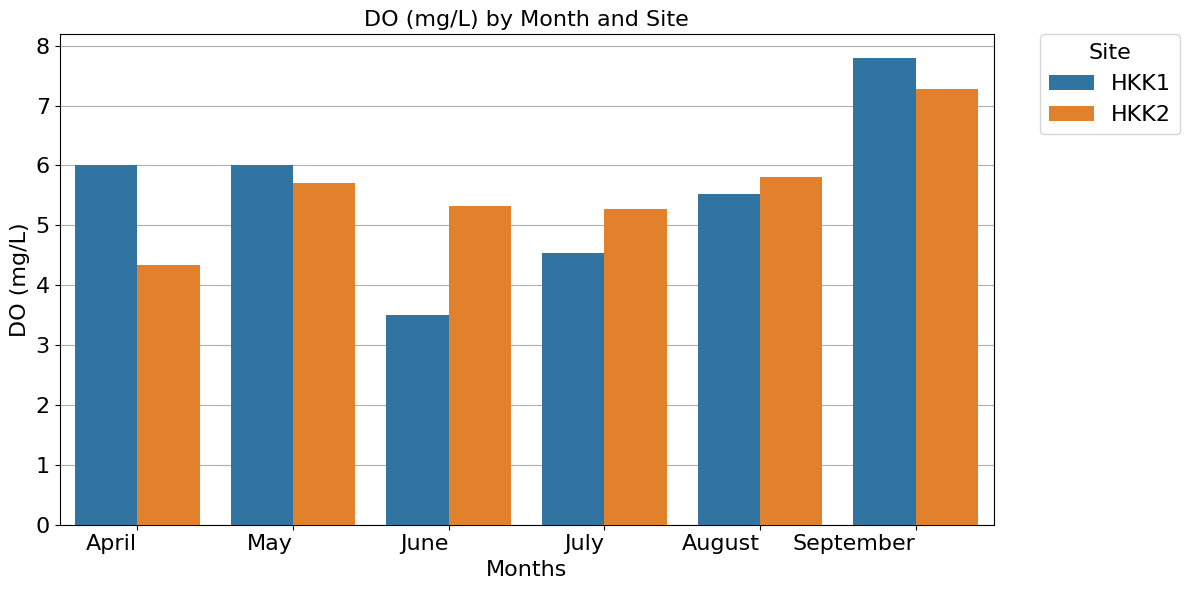

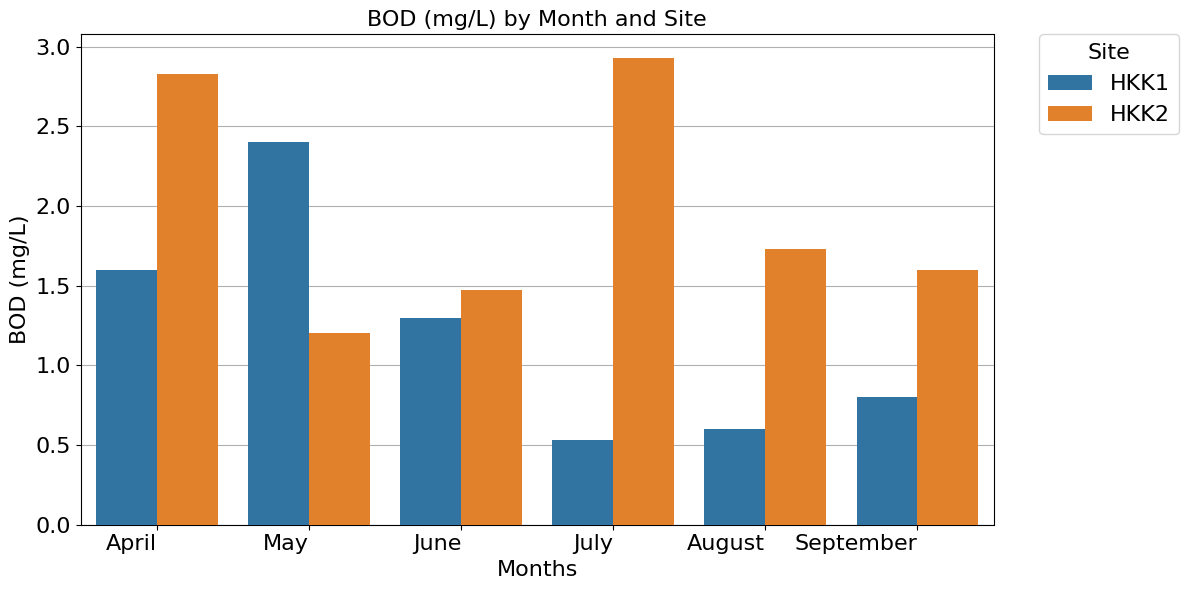

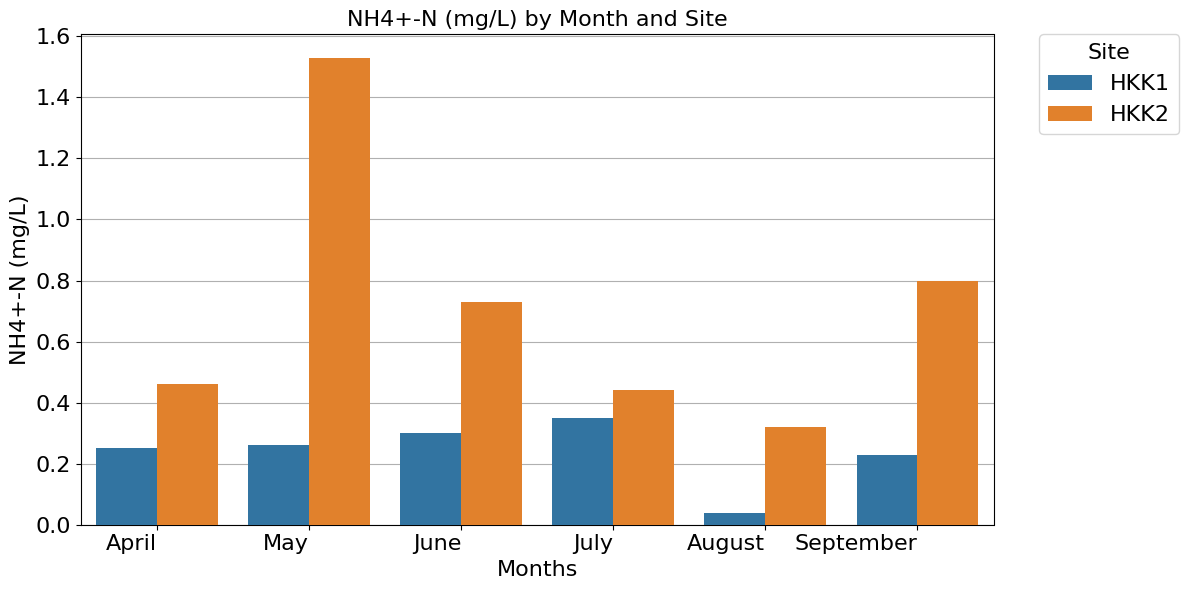

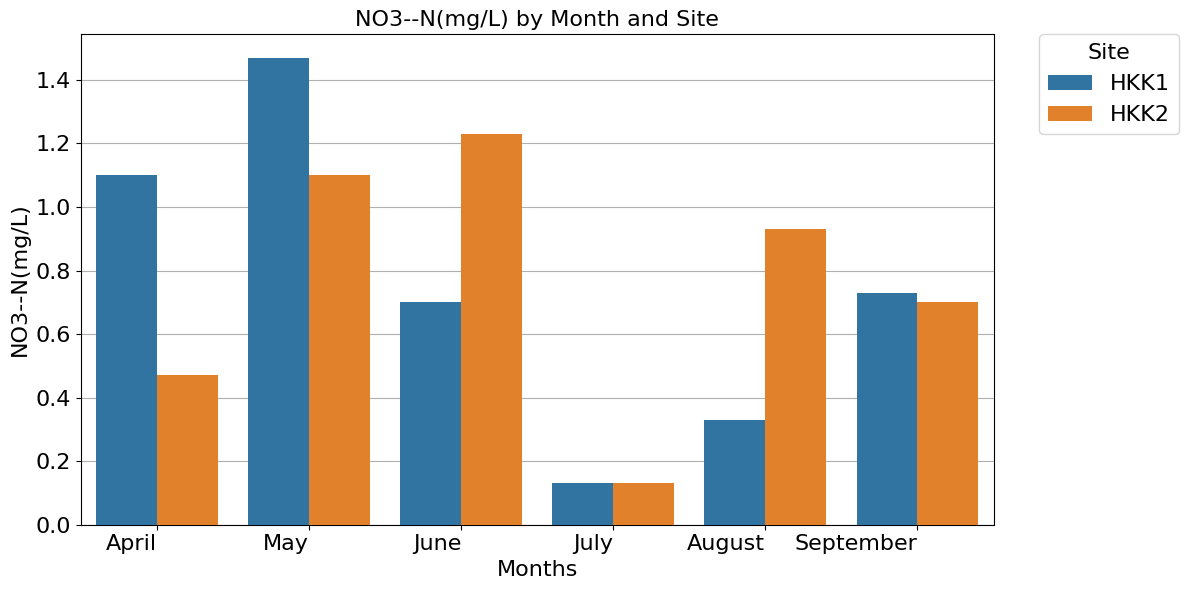

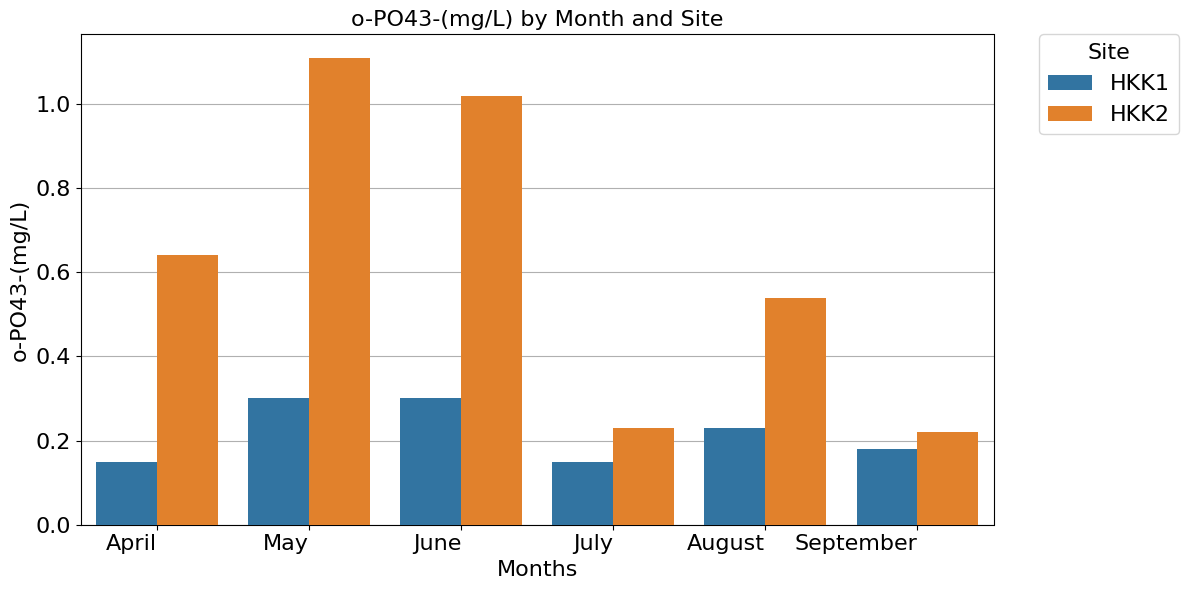

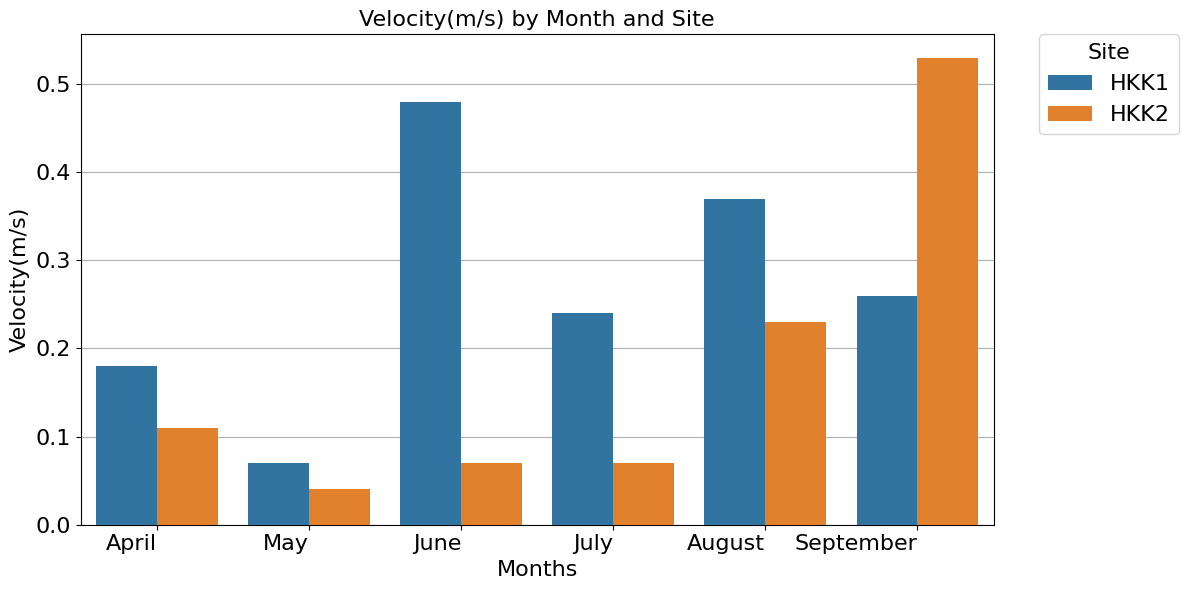

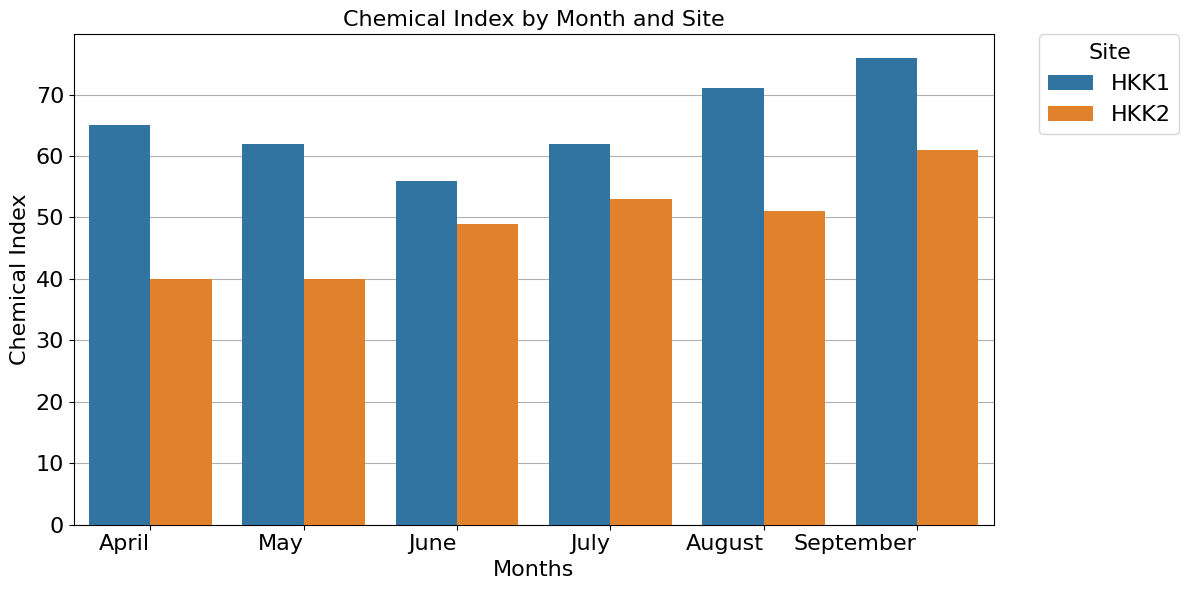

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# List of parameters to plot (excluding 'Month' and 'Site')
parameters = ['AT (°C)', 'WT(°C) ', 'pH', 'Cond. (µs/cm)', 'TDS (mg/L)', 'Turbidity (NTU)',
              'DO (mg/L)', 'BOD (mg/L)', 'NH4+-N (mg/L)', 'NO3--N(mg/L)', 'o-PO43-(mg/L)',
              'Velocity(m/s)', 'Chemical Index']

# Define the desired order of months
month_order = ['April', 'May', 'June', 'July', 'August', 'September']

# Reindex the 'Month' column in the original DataFrame
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Loop through each parameter and generate a bar plot
for param in parameters:
    # Group the data by month and site, then calculate the mean for the parameter
    monthly_site_means = df.groupby(['Month', 'Site'])[param].mean().reset_index()

    # Sort the DataFrame by the 'Month' column
    monthly_site_means = monthly_site_means.sort_values('Month')

    # Create the bar chart
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Month', y=param, hue='Site', data=monthly_site_means, zorder=3)

    # Add grid lines to the background
    ax.yaxis.grid(True, zorder=0)
    ax.xaxis.grid(False)

    # Set the background of the plot to white (to avoid issues with transparency)
    ax.set_facecolor('white')

    # Add labels and title with fontsize
    plt.title(f'{param} by Month and Site', fontsize=16)
    plt.xlabel('Months', fontsize=16)
    plt.ylabel(param, fontsize=16)

    # Adjust x and y ticks font size
    plt.xticks(rotation=0, ha='right', fontsize=16)
    plt.yticks(fontsize=16)

    # Customize the legend font size
    plt.legend(title='Site', fontsize=16, title_fontsize=16, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    # Tight layout to adjust everything nicely
    plt.tight_layout()

    # Show the plot
    plt.show()


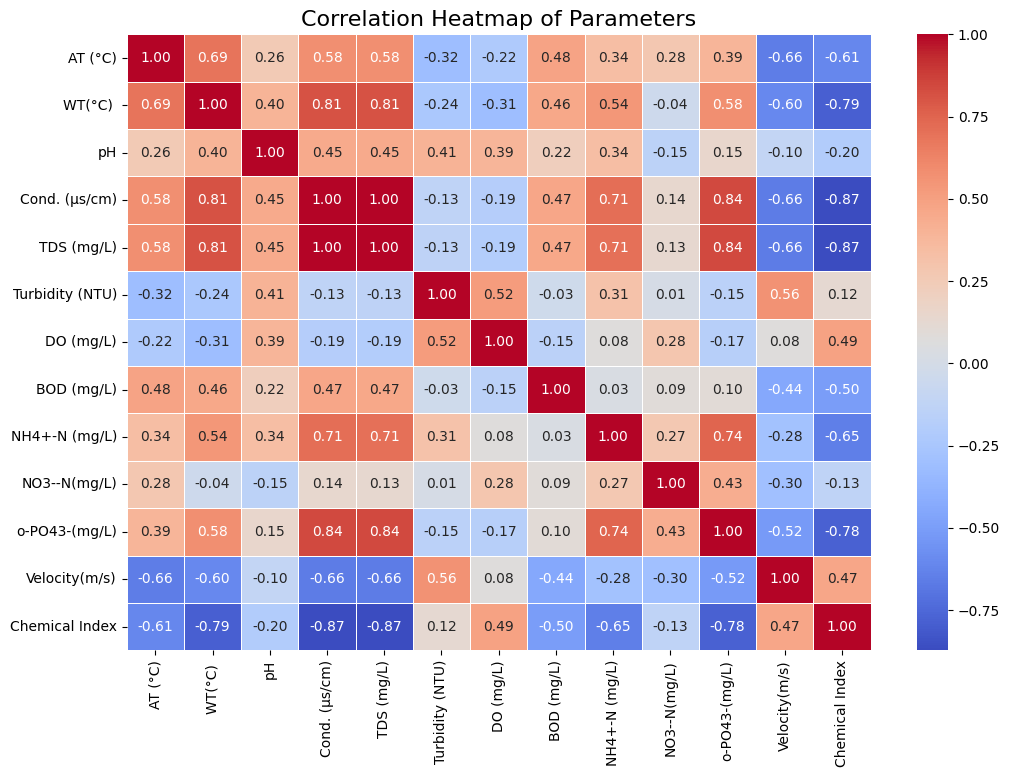

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters to plot
parameters = [ 'AT (°C)', 'WT(°C) ', 'pH', 'Cond. (µs/cm)',
       'TDS (mg/L)', 'Turbidity (NTU)', 'DO (mg/L)', 'BOD (mg/L)',
       'NH4+-N (mg/L)', 'NO3--N(mg/L)', 'o-PO43-(mg/L)', 'Velocity(m/s)',
       'Chemical Index']

corr_matrix = df[parameters].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Parameters', fontsize=16)
plt.show()

#months

In [ ]:
# Drop the 'Season' column and select numeric data
numeric_cols = df.drop(columns=['Site']).select_dtypes(include=['number']).columns
# Group by 'Site ' and calculate the mean for numeric columns only
month_means = df.groupby('Month')[numeric_cols].mean()
print(month_means)


           AT (°C)  WT(°C)      pH  Cond. (µs/cm)  TDS (mg/L)  \
Month                                                           
April        36.00   26.100  8.170        227.000     147.835   
May          33.60   25.865  7.310        243.000     157.500   
June         26.00   25.275  7.415        188.650     122.500   
July         29.00   26.280  7.675        160.665     104.500   
August       28.25   25.490  7.470        109.665      72.165   
September    24.20   23.995  8.095         80.000      51.835   

           Turbidity (NTU)  DO (mg/L)  BOD (mg/L)  NH4+-N (mg/L)  \
Month                                                              
April               12.515      5.165       2.215          0.355   
May                 18.915      5.850       1.800          0.895   
June                14.200      4.415       1.385          0.515   
July                 6.465      4.900       1.730          0.395   
August               4.635      5.665       1.165          0.180   
Sep

## ANOVA test

In [ ]:
from scipy.stats import f_oneway

# Parameters to analyze
parameters = ['AT (°C)', 'WT(°C) ', 'pH', 'Cond. (µs/cm)',
       'TDS (mg/L)', 'Turbidity (NTU)', 'DO (mg/L)', 'BOD (mg/L)',
       'NH4+-N (mg/L)', 'NO3--N(mg/L)', 'o-PO43-(mg/L)', 'Velocity(m/s)',
       'Chemical Index']

# Results storage
anova_results = {}

# Perform ANOVA for each parameter
for param in parameters:
    # Group parameter values by Site
    groups = [group[param].values for name, group in df.groupby('Month')]

    # Perform ANOVA
    f_stat, p_value = f_oneway(*groups)

    # Store results
    anova_results[param] = {'F-statistic': f_stat, 'p-value': p_value}

# Display results
for param, result in anova_results.items():
    print(f"Parameter: {param}")
    print(f"  F-statistic: {result['F-statistic']:.2f}")
    print(f"  p-value: {result['p-value']:.4f}")
    print("  Significant difference: ", "Yes" if result['p-value'] < 0.05 else "No")
    print()


Parameter: AT (°C)
  F-statistic: 6.58
  p-value: 0.0200
  Significant difference:  Yes

Parameter: WT(°C) 
  F-statistic: 0.67
  p-value: 0.6595
  Significant difference:  No

Parameter: pH
  F-statistic: 1.34
  p-value: 0.3629
  Significant difference:  No

Parameter: Cond. (µs/cm)
  F-statistic: 0.32
  p-value: 0.8819
  Significant difference:  No

Parameter: TDS (mg/L)
  F-statistic: 0.32
  p-value: 0.8822
  Significant difference:  No

Parameter: Turbidity (NTU)
  F-statistic: 1.44
  p-value: 0.3330
  Significant difference:  No

Parameter: DO (mg/L)
  F-statistic: 3.97
  p-value: 0.0617
  Significant difference:  No

Parameter: BOD (mg/L)
  F-statistic: 0.37
  p-value: 0.8505
  Significant difference:  No

Parameter: NH4+-N (mg/L)
  F-statistic: 0.61
  p-value: 0.6966
  Significant difference:  No

Parameter: NO3--N(mg/L)
  F-statistic: 3.00
  p-value: 0.1071
  Significant difference:  No

Parameter: o-PO43-(mg/L)
  F-statistic: 0.76
  p-value: 0.6069
  Significant difference:  N

#sites


In [ ]:
# Drop the 'Season' column and select numeric data
numeric_cols = df.drop(columns=['Month']).select_dtypes(include=['number']).columns
# Group by 'Site ' and calculate the mean for numeric columns only
month_means = df.groupby('Site')[numeric_cols].mean()
print(month_means)


        AT (°C)    WT(°C)         pH  Cond. (µs/cm)  TDS (mg/L)  \
Site                                                              
HKK1  28.150000  24.600000  7.431667      65.495000   43.111667   
HKK2  30.866667  26.401667  7.946667     270.831667  175.666667   

      Turbidity (NTU)  DO (mg/L)  BOD (mg/L)  NH4+-N (mg/L)  NO3--N(mg/L)  \
Site                                                                        
HKK1        13.933333   5.560000       1.205       0.238333      0.743333   
HKK2        62.876667   5.616667       1.960       0.713333      0.760000   

      o-PO43-(mg/L)  Velocity(m/s)  Chemical Index  
Site                                                
HKK1       0.218333       0.266667       65.333333  
HKK2       0.626667       0.175000       49.000000  


In [ ]:
from scipy.stats import ttest_ind

# Parameters to analyze
parameters = ['AT (°C)', 'WT(°C) ', 'pH', 'Cond. (µs/cm)',
              'TDS (mg/L)', 'Turbidity (NTU)', 'DO (mg/L)', 'BOD (mg/L)',
              'NH4+-N (mg/L)', 'NO3--N(mg/L)', 'o-PO43-(mg/L)', 'Velocity(m/s)',
              'Chemical Index']

# Results storage
t_test_results = {}

# Perform t-test for each parameter
for param in parameters:
    # Separate data for each site
    site1_data = df[df['Site'] == 'HKK1'][param].dropna()  # Drop NaN values
    site2_data = df[df['Site'] == 'HKK2'][param].dropna()  # Drop NaN values

    # Perform t-test
    t_stat, p_value = ttest_ind(site1_data, site2_data, equal_var=False)  # Welch's t-test

    # Store results
    t_test_results[param] = {'t-statistic': t_stat, 'p-value': p_value}

# Display results
for param, result in t_test_results.items():
    print(f"Parameter: {param}")
    print(f"  t-statistic: {result['t-statistic']:.2f}")
    print(f"  p-value: {result['p-value']:.4f}")
    print("  Significant difference: ", "Yes" if result['p-value'] < 0.05 else "No")
    print()


Parameter: AT (°C)
  t-statistic: -1.01
  p-value: 0.3365
  Significant difference:  No

Parameter: WT(°C) 
  t-statistic: -3.24
  p-value: 0.0097
  Significant difference:  Yes

Parameter: pH
  t-statistic: -2.15
  p-value: 0.0695
  Significant difference:  No

Parameter: Cond. (µs/cm)
  t-statistic: -4.29
  p-value: 0.0069
  Significant difference:  Yes

Parameter: TDS (mg/L)
  t-statistic: -4.25
  p-value: 0.0072
  Significant difference:  Yes

Parameter: Turbidity (NTU)
  t-statistic: -0.99
  p-value: 0.3685
  Significant difference:  No

Parameter: DO (mg/L)
  t-statistic: -0.08
  p-value: 0.9386
  Significant difference:  No

Parameter: BOD (mg/L)
  t-statistic: -1.80
  p-value: 0.1020
  Significant difference:  No

Parameter: NH4+-N (mg/L)
  t-statistic: -2.57
  p-value: 0.0452
  Significant difference:  Yes

Parameter: NO3--N(mg/L)
  t-statistic: -0.06
  p-value: 0.9505
  Significant difference:  No

Parameter: o-PO43-(mg/L)
  t-statistic: -2.59
  p-value: 0.0456
  Significant 